# Initial questions from the paper

#### In the Penchovsky paper, we see a number of attempts at building logic gates with riboswitches. We focus on riboswitches for YES, NOT, AND, and OR gates. The inputs to the gates are binding events of oligonucleotides to the OBS binding sites within the RNA switches. The output corresponds to a possible self-cleaving event, when certain bases (marked as red in the paper) form pairs with each other. 

#### The intended behavior for the switches is as follows:

#### AND-1: Output only when oligos bind to the OBS-1 and OBS-2 sites. No output otherwise.

#### YES-1: Output only when an oligo binds to the OBS. 

#### NOT-1: Output whenever there is no bound to the OBS. No output when oligo bound to the OBS.

#### OR-1: Output when either one or both of the OB sites are bound with oligos. No output otherwise. 



## Getting the Sequences 

### It does not appear that there is any reference to the riboswitch sequences' location online for download. Reading them manually from the paper's figures:

**Table 1. Riboswitch Sequence **



|Riboswitch | <div style="text-align: left">Sequence (5'->)</div>                                                                    |
|----------|-------------------------------------------------------------------------------------------------------------------|
|<div style="text-align: left">YES-1</div>|<div style="text-align: left">GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC</div>|
|<div style="text-align: left">NOT-1</div>|<div style="text-align: left">GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC</div>                    |
|<div style="text-align: left">AND-1</div>|<div style="text-align: left">GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU</div>|
|<div style="text-align: left">OR-1</div>|<div style="text-align: left">GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC</div>        |


**Table 2. Riboswitch Annotation **

| Riboswitch | OBS-1 Bases (5'->) | OBS-2 Bases (5'->) | Switch Site  (5'->)|Swith Site Complement (5'->)|
|-----------------|--------------------|--------------------|--------------------------|----------------------|
|<div style="text-align: left">YES-1</div>|<div style="text-align: center">26 - 47</div>|<div style="text-align: center">N/A</div>| <div style="text-align: center">16 - 21</div>|<div style="text-align: center">49 - 54</div>|
|<div style="text-align: left">NOT-1</div>|<div style="text-align: center">44 - 66</div>|<div style="text-align: center">N/A</div>|<div style="text-align: center">40 - 43</div>|<div style="text-align: center">74 - 77</div>| 
|<div style="text-align: left">AND-1</div>|<div style="text-align: center">30 - 45</div>|<div style="text-align: center">49 - 64</div>|<div style="text-align: center">16 -23</div>|<div style="text-align: center">70 - 78</div>|
|<div style="text-align: left">OR-1</div>|<div style="text-align: center">27 - 46</div>|<div style="text-align: center">47 - 66</div>|<div style="text-align: center">16 - 27</div> |<div style="text-align: center">67 - 77</div>|


# Folding the RNA sequences using RNAfold

In [24]:
import subprocess

yes1 = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
not1 = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC'
and1 = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
or1 = 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

switch_seqs = [yes1, not1, and1, or1]
names = ['YES-1', 'NOT-1', 'AND-1', 'OR-1']
for i in range(len(switch_seqs)):
    folded_seq = subprocess.run('RNAfold', input=bytes(switch_seqs[i], 'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    print('Here is the RNAfold output for the ' + names[i] + ' riboswitch:')
    print(folded_seq.stderr.decode())
    print(folded_seq.stdout.decode())
    


Here is the RNAfold output for the YES-1 riboswitch:

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)

Here is the RNAfold output for the NOT-1 riboswitch:

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)

Here is the RNAfold output for the AND-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)

Here is the RNAfold output for the OR-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).)))))..

# Comparing the RNAfold output against the Pechovsky paper for YES-1



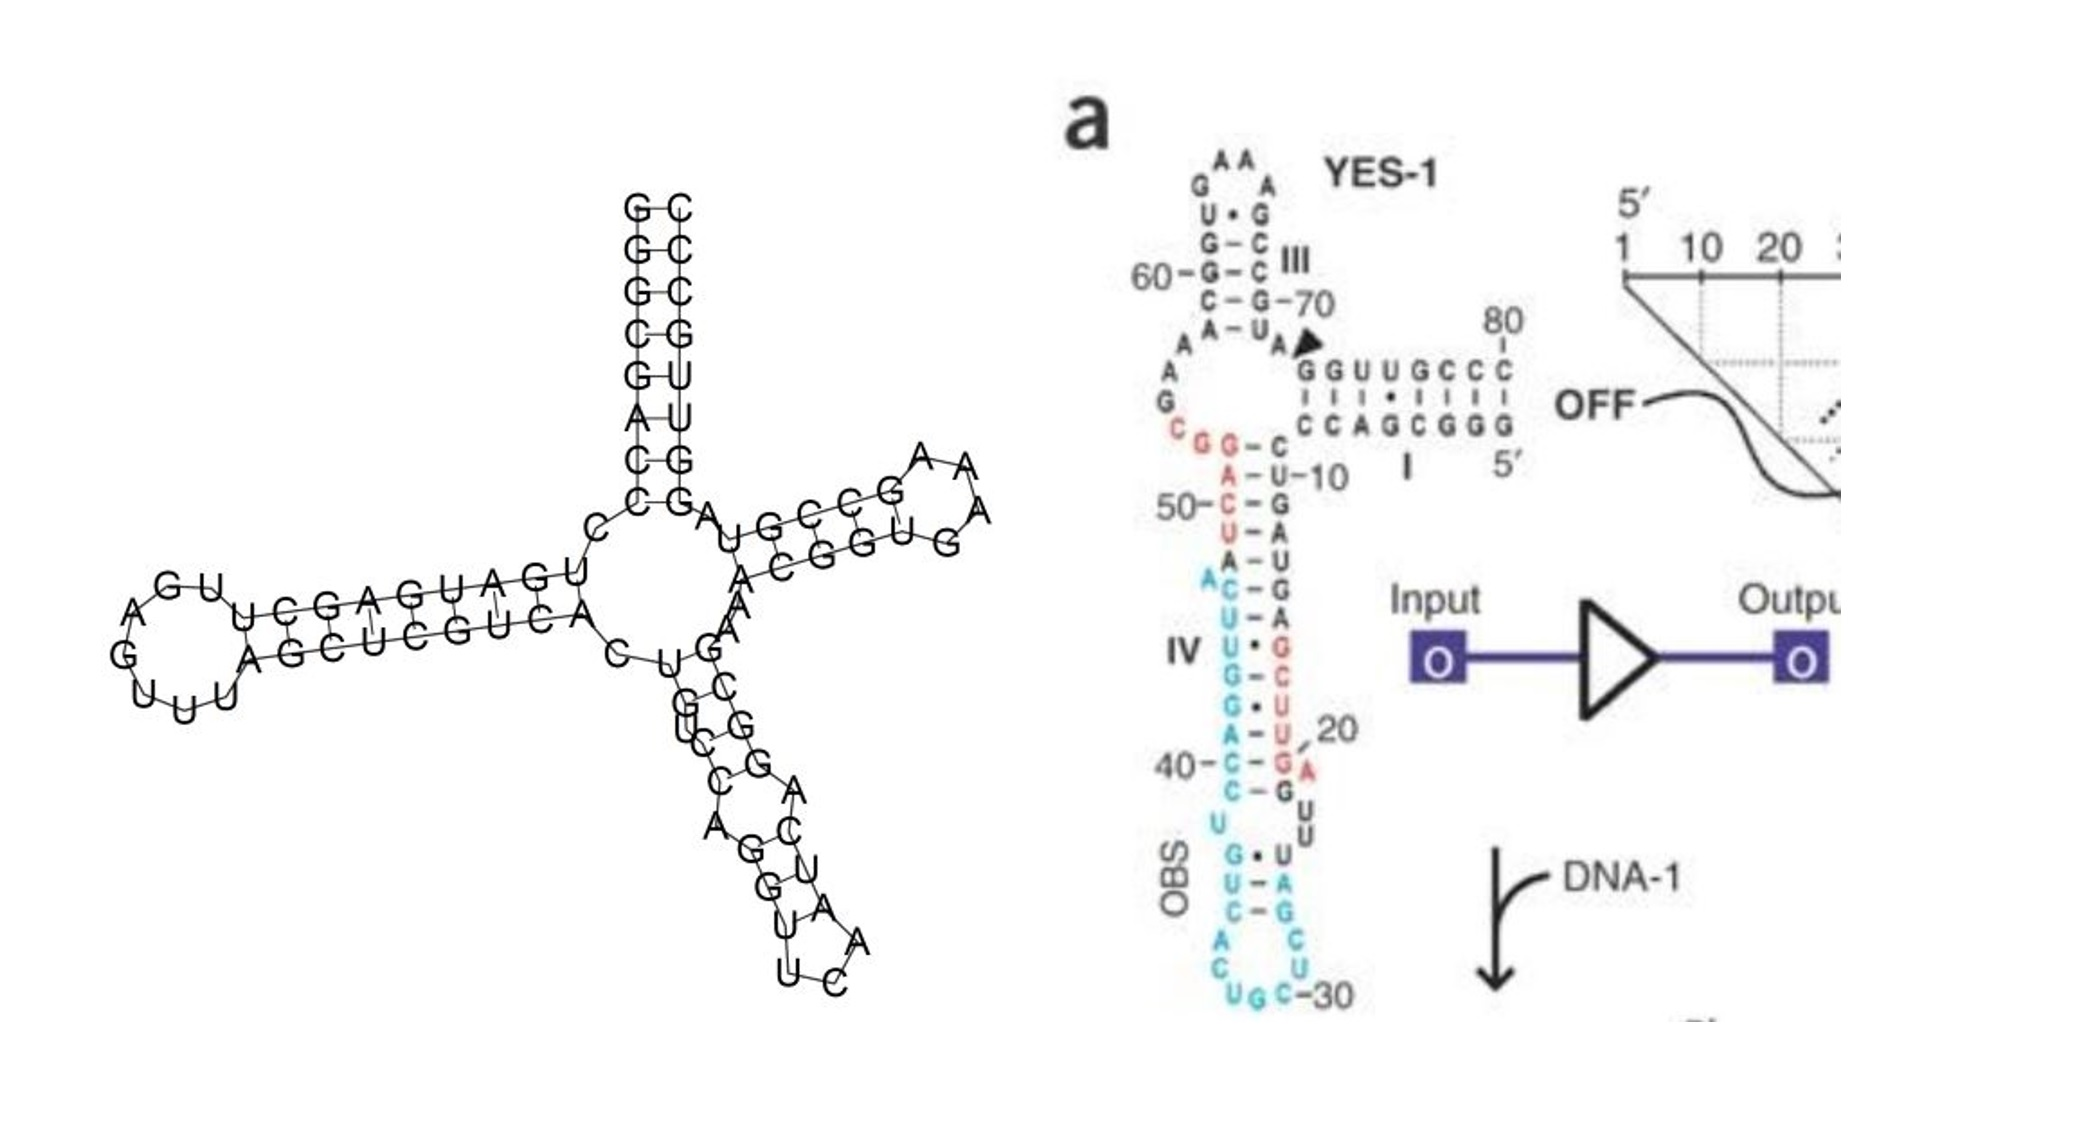

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 


PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "yes1foldvpred.jpg", width=700, height=700)

#### We see that the YES-1 RNAfold predicted structure does not match the structure. There is an extra stem in the RNAfold predicted structure not shown in the conformation reported in the paper. The extra stem forms at the base where the U at position 36 is bound to the G at position 55.  This **is** a folding pattern predicted in the dot matrix plot in figure 2a, between the base-pairings labeled II and III on the graph.

## Comparing the predicted and reported structures for the NOT-1 switch  

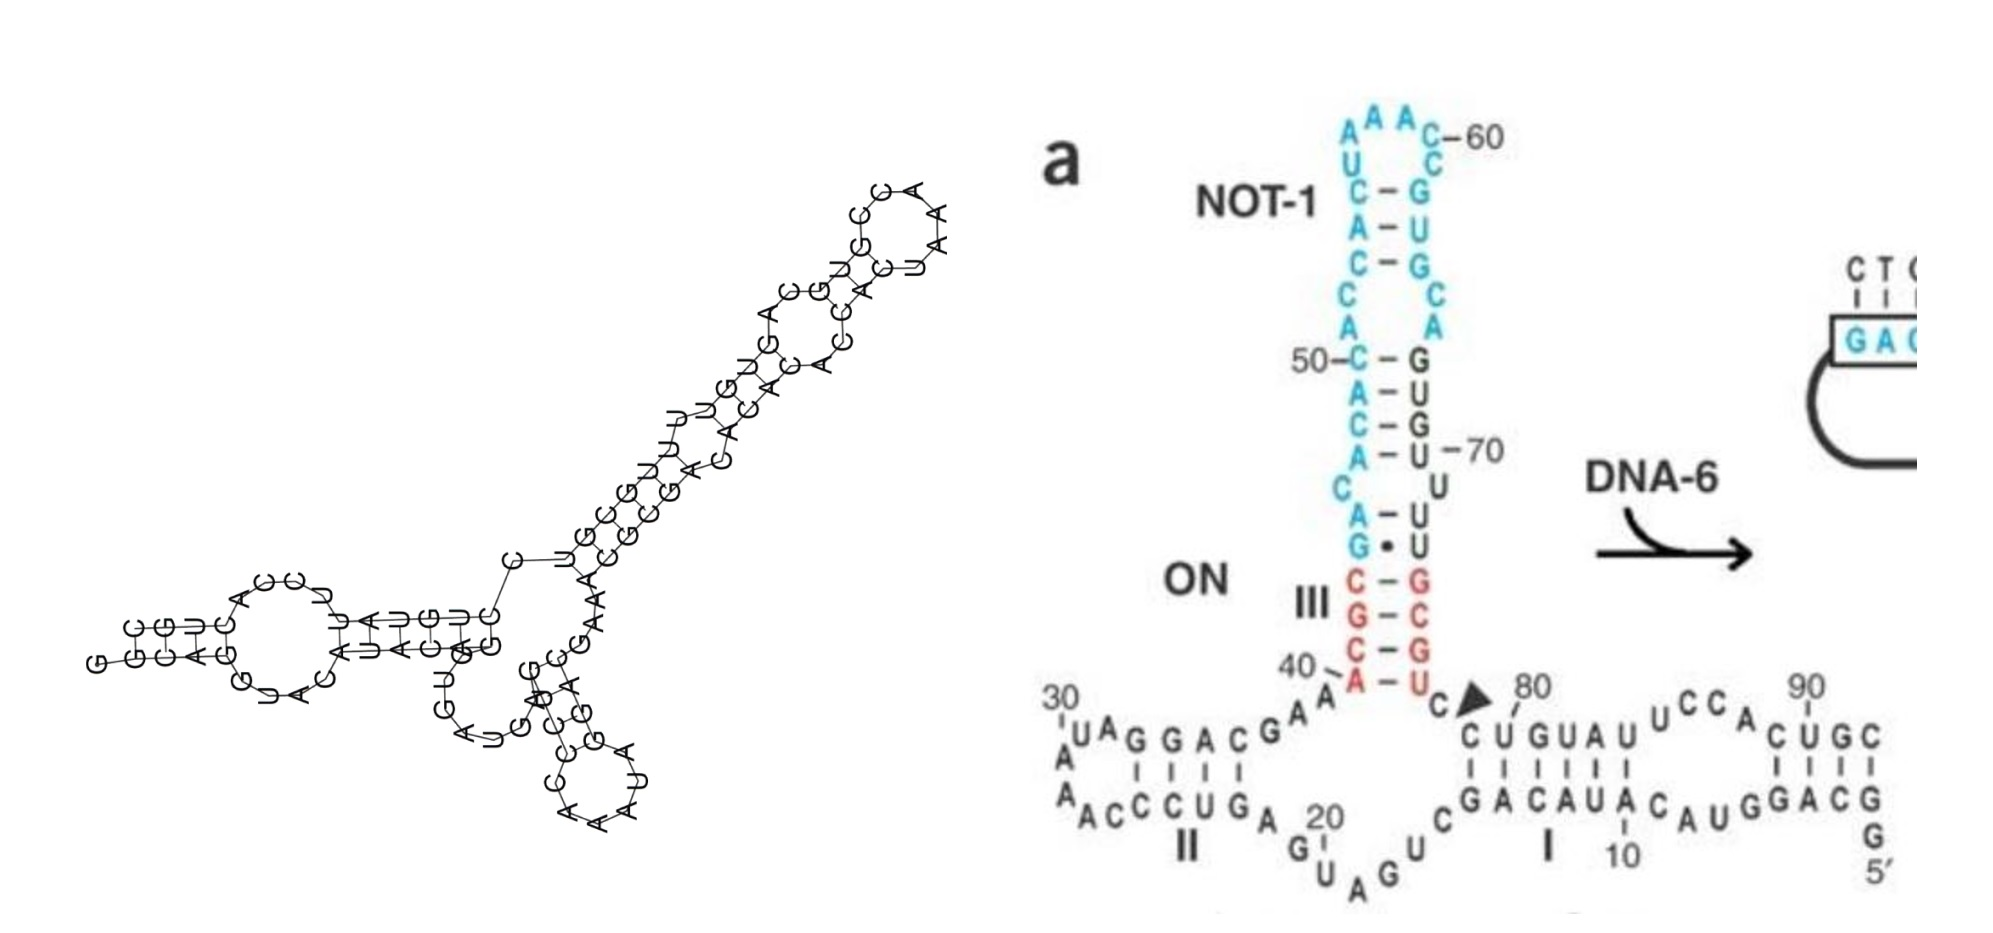

In [19]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "not1foldvpred.jpg", width=700, height=700)

#### At first glance, the folds might appear to be different, but that is simply due to a difference in representation. These are, in fact, identical structures with identical base-pairing. This becomes more clear when you realize these are mirrored images of the structure (another quirk of the different ways of representing the images). 

## Comparing the AND-1 predicted vs. reported structure 

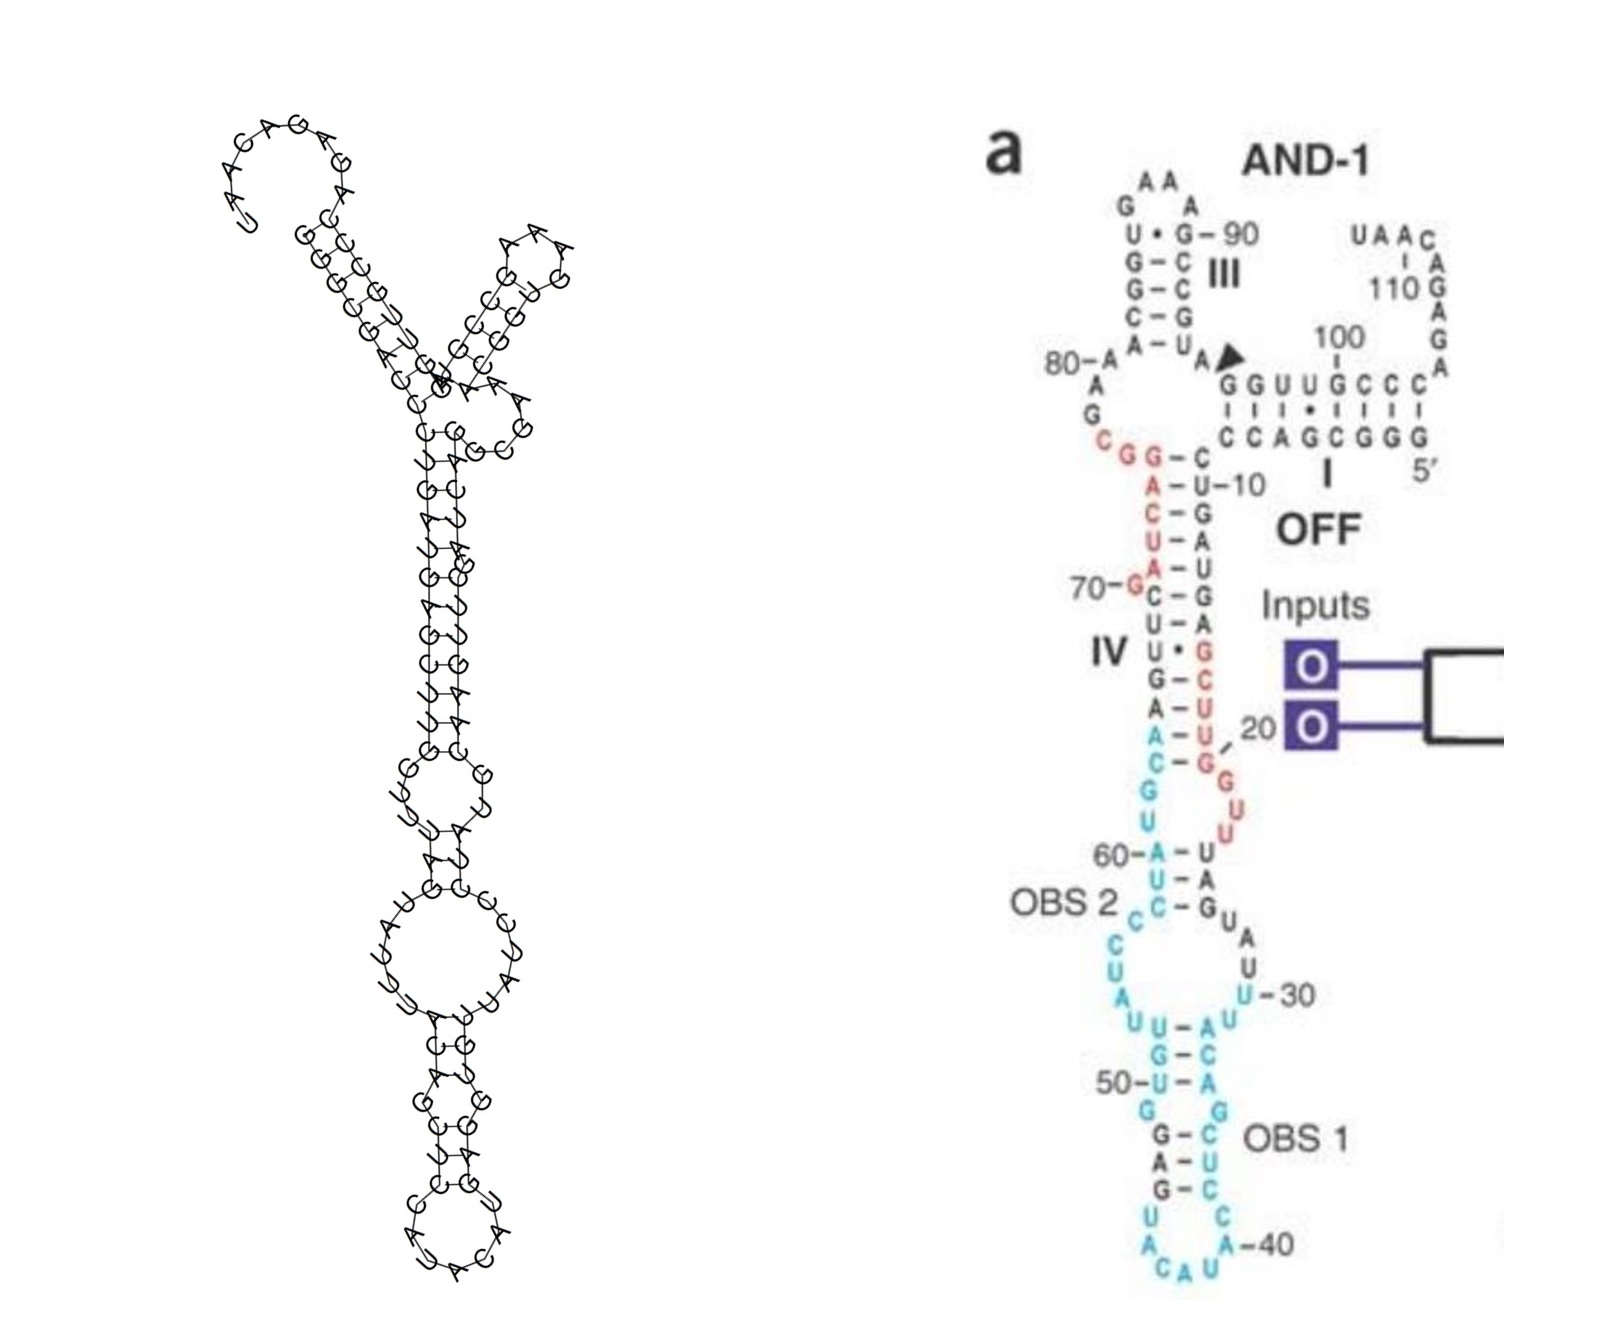

In [157]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "and1foldvpred.jpg", width=600, height=600)

#### Again, we see that RNAfold came up with the same structure for the AND-1 riboswitch as was reported in the Pechovsky paper.

## Comparing the OR-1 predicted vs. reported structure

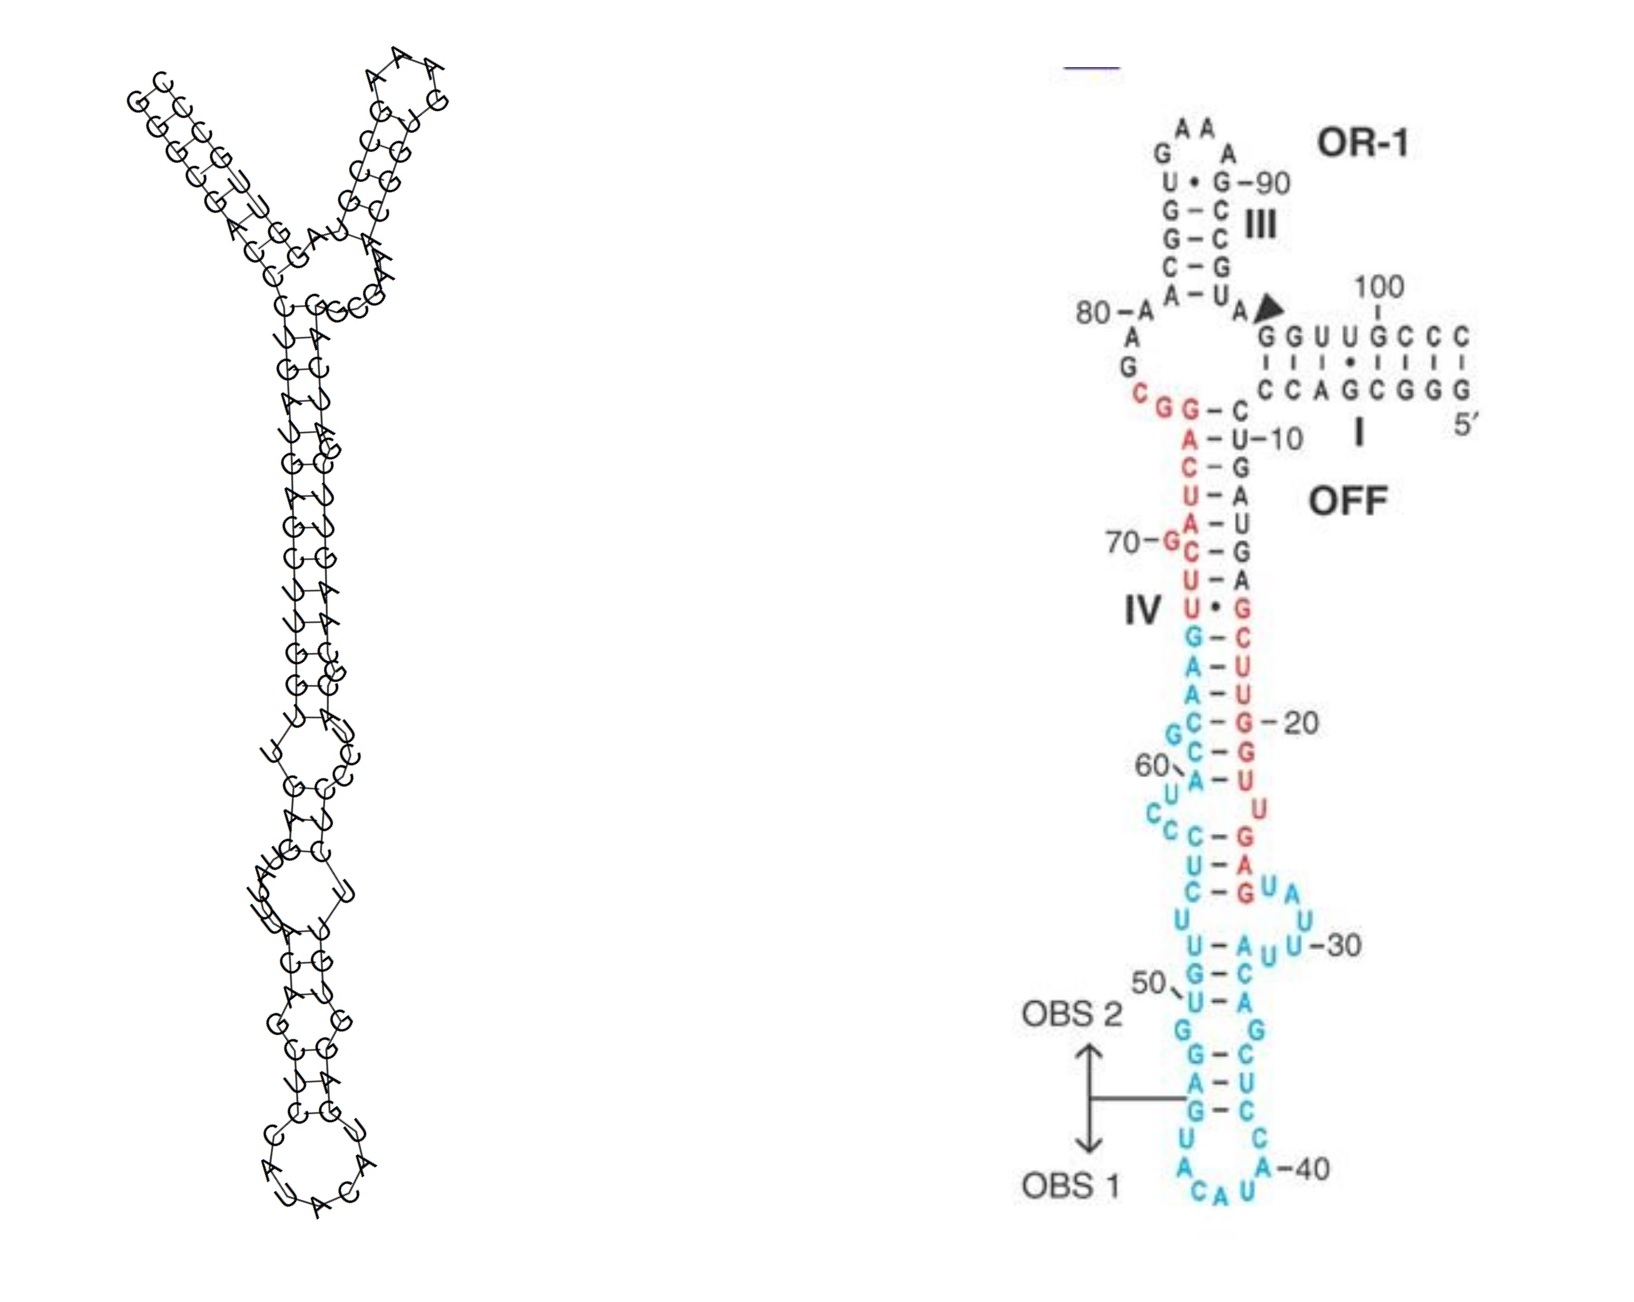

In [156]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "or1foldvpred.jpg", width=600, height=600)

### Again, like for the NOT-1, and AND-1 riboswitches, these structures share the exact same base-pairing. 

# Setting constraints for the oligo binding sites and re-folding in RNAfold

In [94]:
yes1_constraints = ''
for i in range(len(yes1)):
    if (i + 1 >= 26) and (i + 1 <= 47):
        yes1_constraints = yes1_constraints + 'x'
    else:
        yes1_constraints = yes1_constraints + '.'
        
print("This is what the YES-1 constraint file looks like:\n " + yes1_constraints)

not1_constraints = ''
for j in range(len(not1)):
    if (j >= 44) and (j <= 66):
        not1_constraints = not1_constraints + 'x'
    else:
        not1_constraints = not1_constraints + '.'
        

f = open("YES-1_constraints.txt", "+w")
for i in range(len(yes1_constraints)):
    f.write(yes1_constraints[i])
f.close()

f = open("NOT-1_constraints.txt", "+w")
for j in range(len(not1_constraints)):
    f.write(not1_constraints[j])
f.close()

This is what the YES-1 constraint file looks like:
 .........................xxxxxxxxxxxxxxxxxxxxxx.................................


In [155]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(yes1 + '\n' +(open('YES-1_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the oligo-bound YES-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())
    

Here is the RNAfold output for the oligo-bound YES-1 riboswitch:

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)



## Comparing the predicted YES-1 oligo-bound fold to the reported fold 

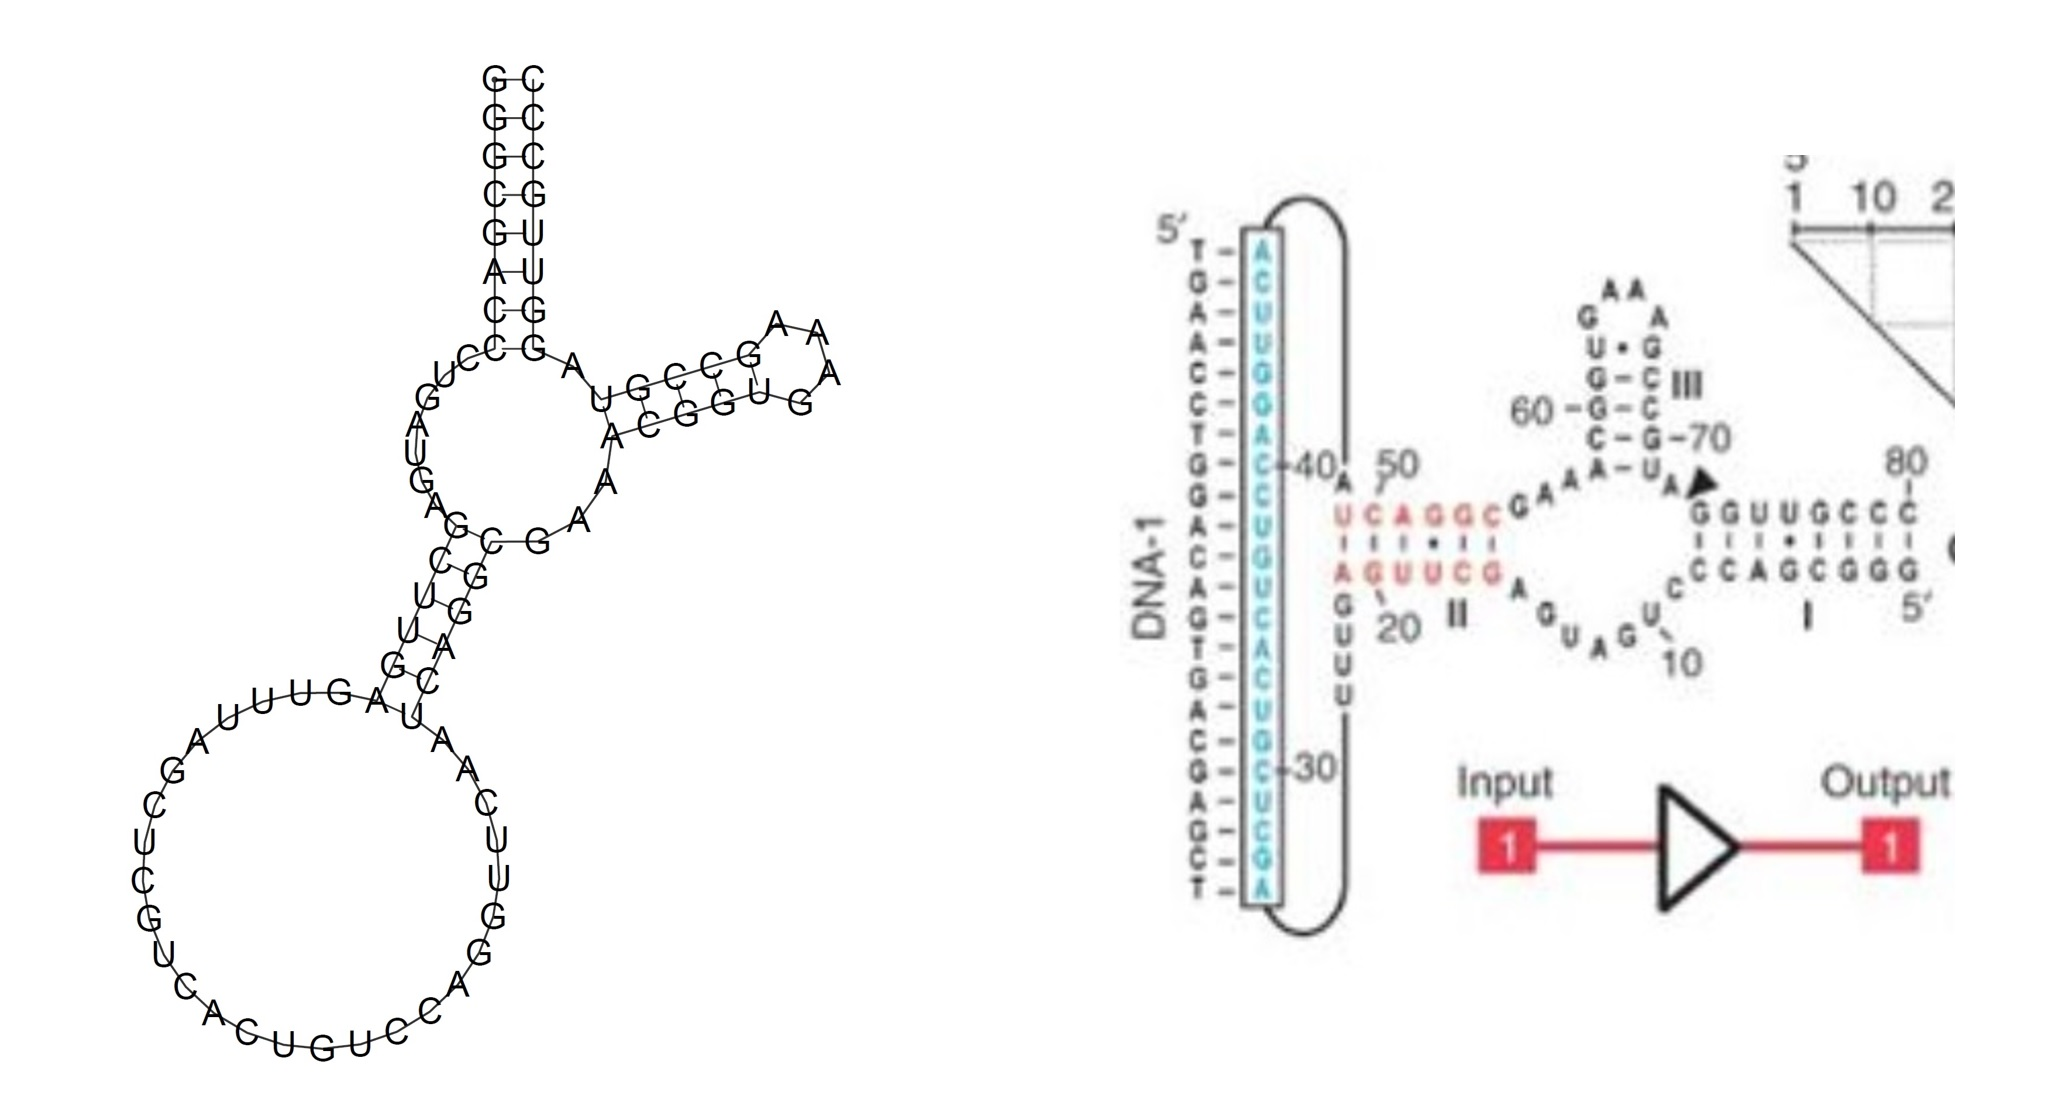

In [160]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "yes1constrainedcomp.jpg", width=700, height=700)

#### We see that that, although there is a discrepancy between the unbound structures, the oligo-bound structures have the exact same base-pairing, and so we see that the base-pairs in red are forming Watson-Crick pairs. 

## Folding and viewing the oligo-bound NOT-1 switch

In [161]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(not1 + '\n' +(open('NOT-1_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the oligo-bound NOT-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the oligo-bound NOT-1 riboswitch:

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((...........................))))).))))))))))....)))) (-16.00)



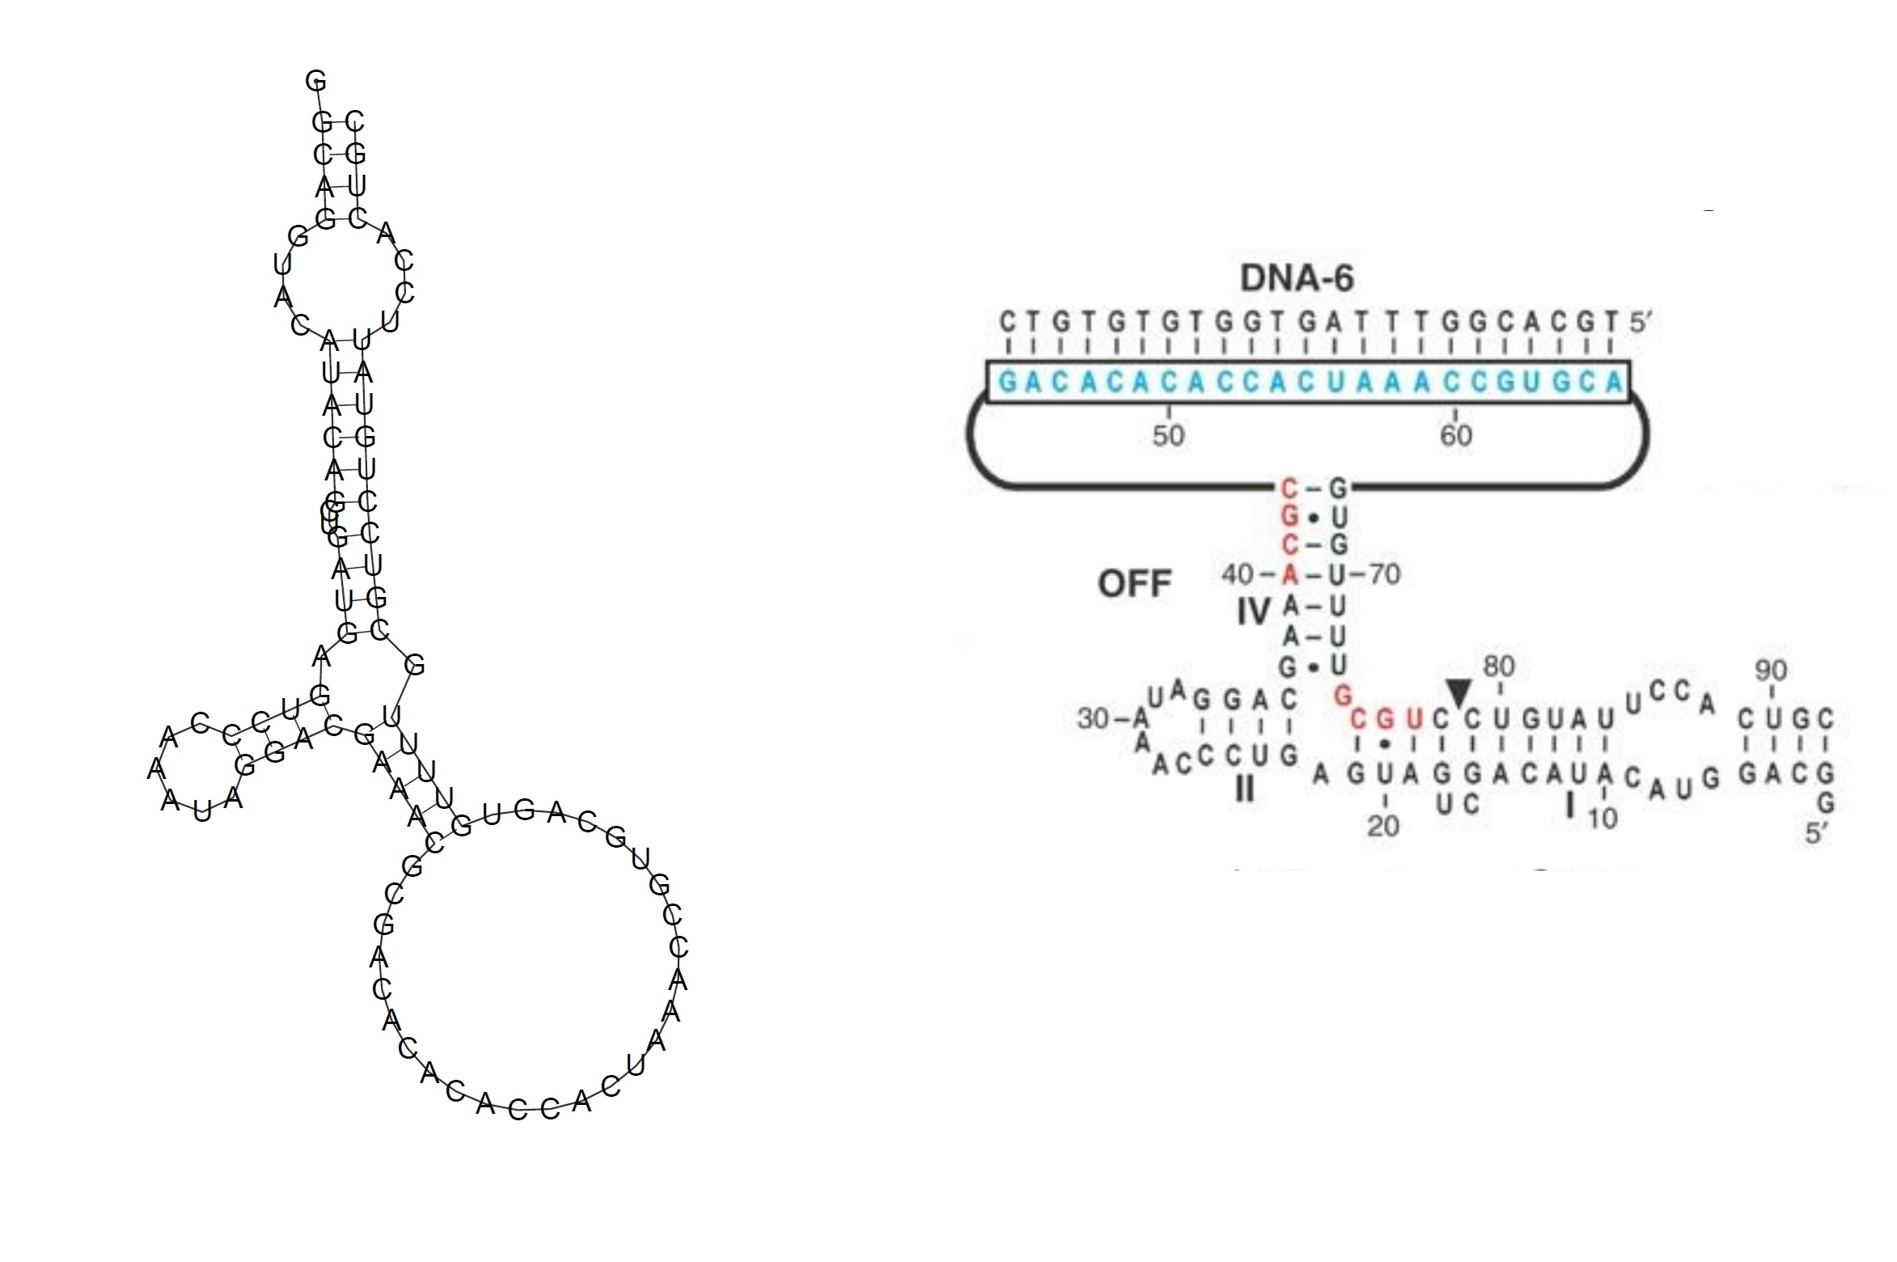

In [162]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "not1constrainedcomp.jpg", width=700, height=700)

#### While very similar, we see that the stem containing the OBS in the RNAfold prediction is two base-pairs shorter than the conformation reported in the paper. In the paper, we see that the C in postition 43 is hydrogen bonded to the G in position 67 (with the G and U in positions 42 and 68, respectively, not forming a Watson-Crick pair).

# Generating constraint files for the four truth conditions of the AND-1 riboswitch

In [202]:

def and_obs_constraints(tru_val, start1, end1, start2, end2):

    and1_constraints = ''
    for i in range(len(and1)):
        if (i >= start1) and (i <= end1):
            and1_constraints = and1_constraints + 'x'
        elif(i >= start2) and (i <= end2):
            and1_constraints = and1_constraints + 'x'            
        else:
            and1_constraints = and1_constraints + '.'
        
    f = open("AND-1_%s_constraints.txt" %tru_val, "+w")
    for i in range(len(and1_constraints)):
        f.write(and1_constraints[i])
    f.close()
       

and_obs_constraints('TF', 30, 45, 200, 200) #input 200 when input is "false" 
and_obs_constraints('TT', 30, 45, 49, 64)
and_obs_constraints('FT', 200, 200, 49, 64)



## Let's run these through RNAfold with the constraints (have to run it one at a time to snag the photos of the folds)

In [204]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(and1 + '\n' +(open('AND-1_TF_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the T/F AND-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the T/F AND-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)



In [205]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(and1 + '\n' +(open('AND-1_TT_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the T/T AND-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the T/T AND-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((................................................)))).))))).....(((((....))))).))))))))......... (-26.30)



In [206]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(and1 + '\n' +(open('AND-1_FT_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the F/T AND-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the F/T AND-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((.(((....(((...(((.......))))))..))).))..................((((......))))(((((....))))).))))))))......... (-28.30)



## Now let's see how the RNAfold predictions match up to the paper

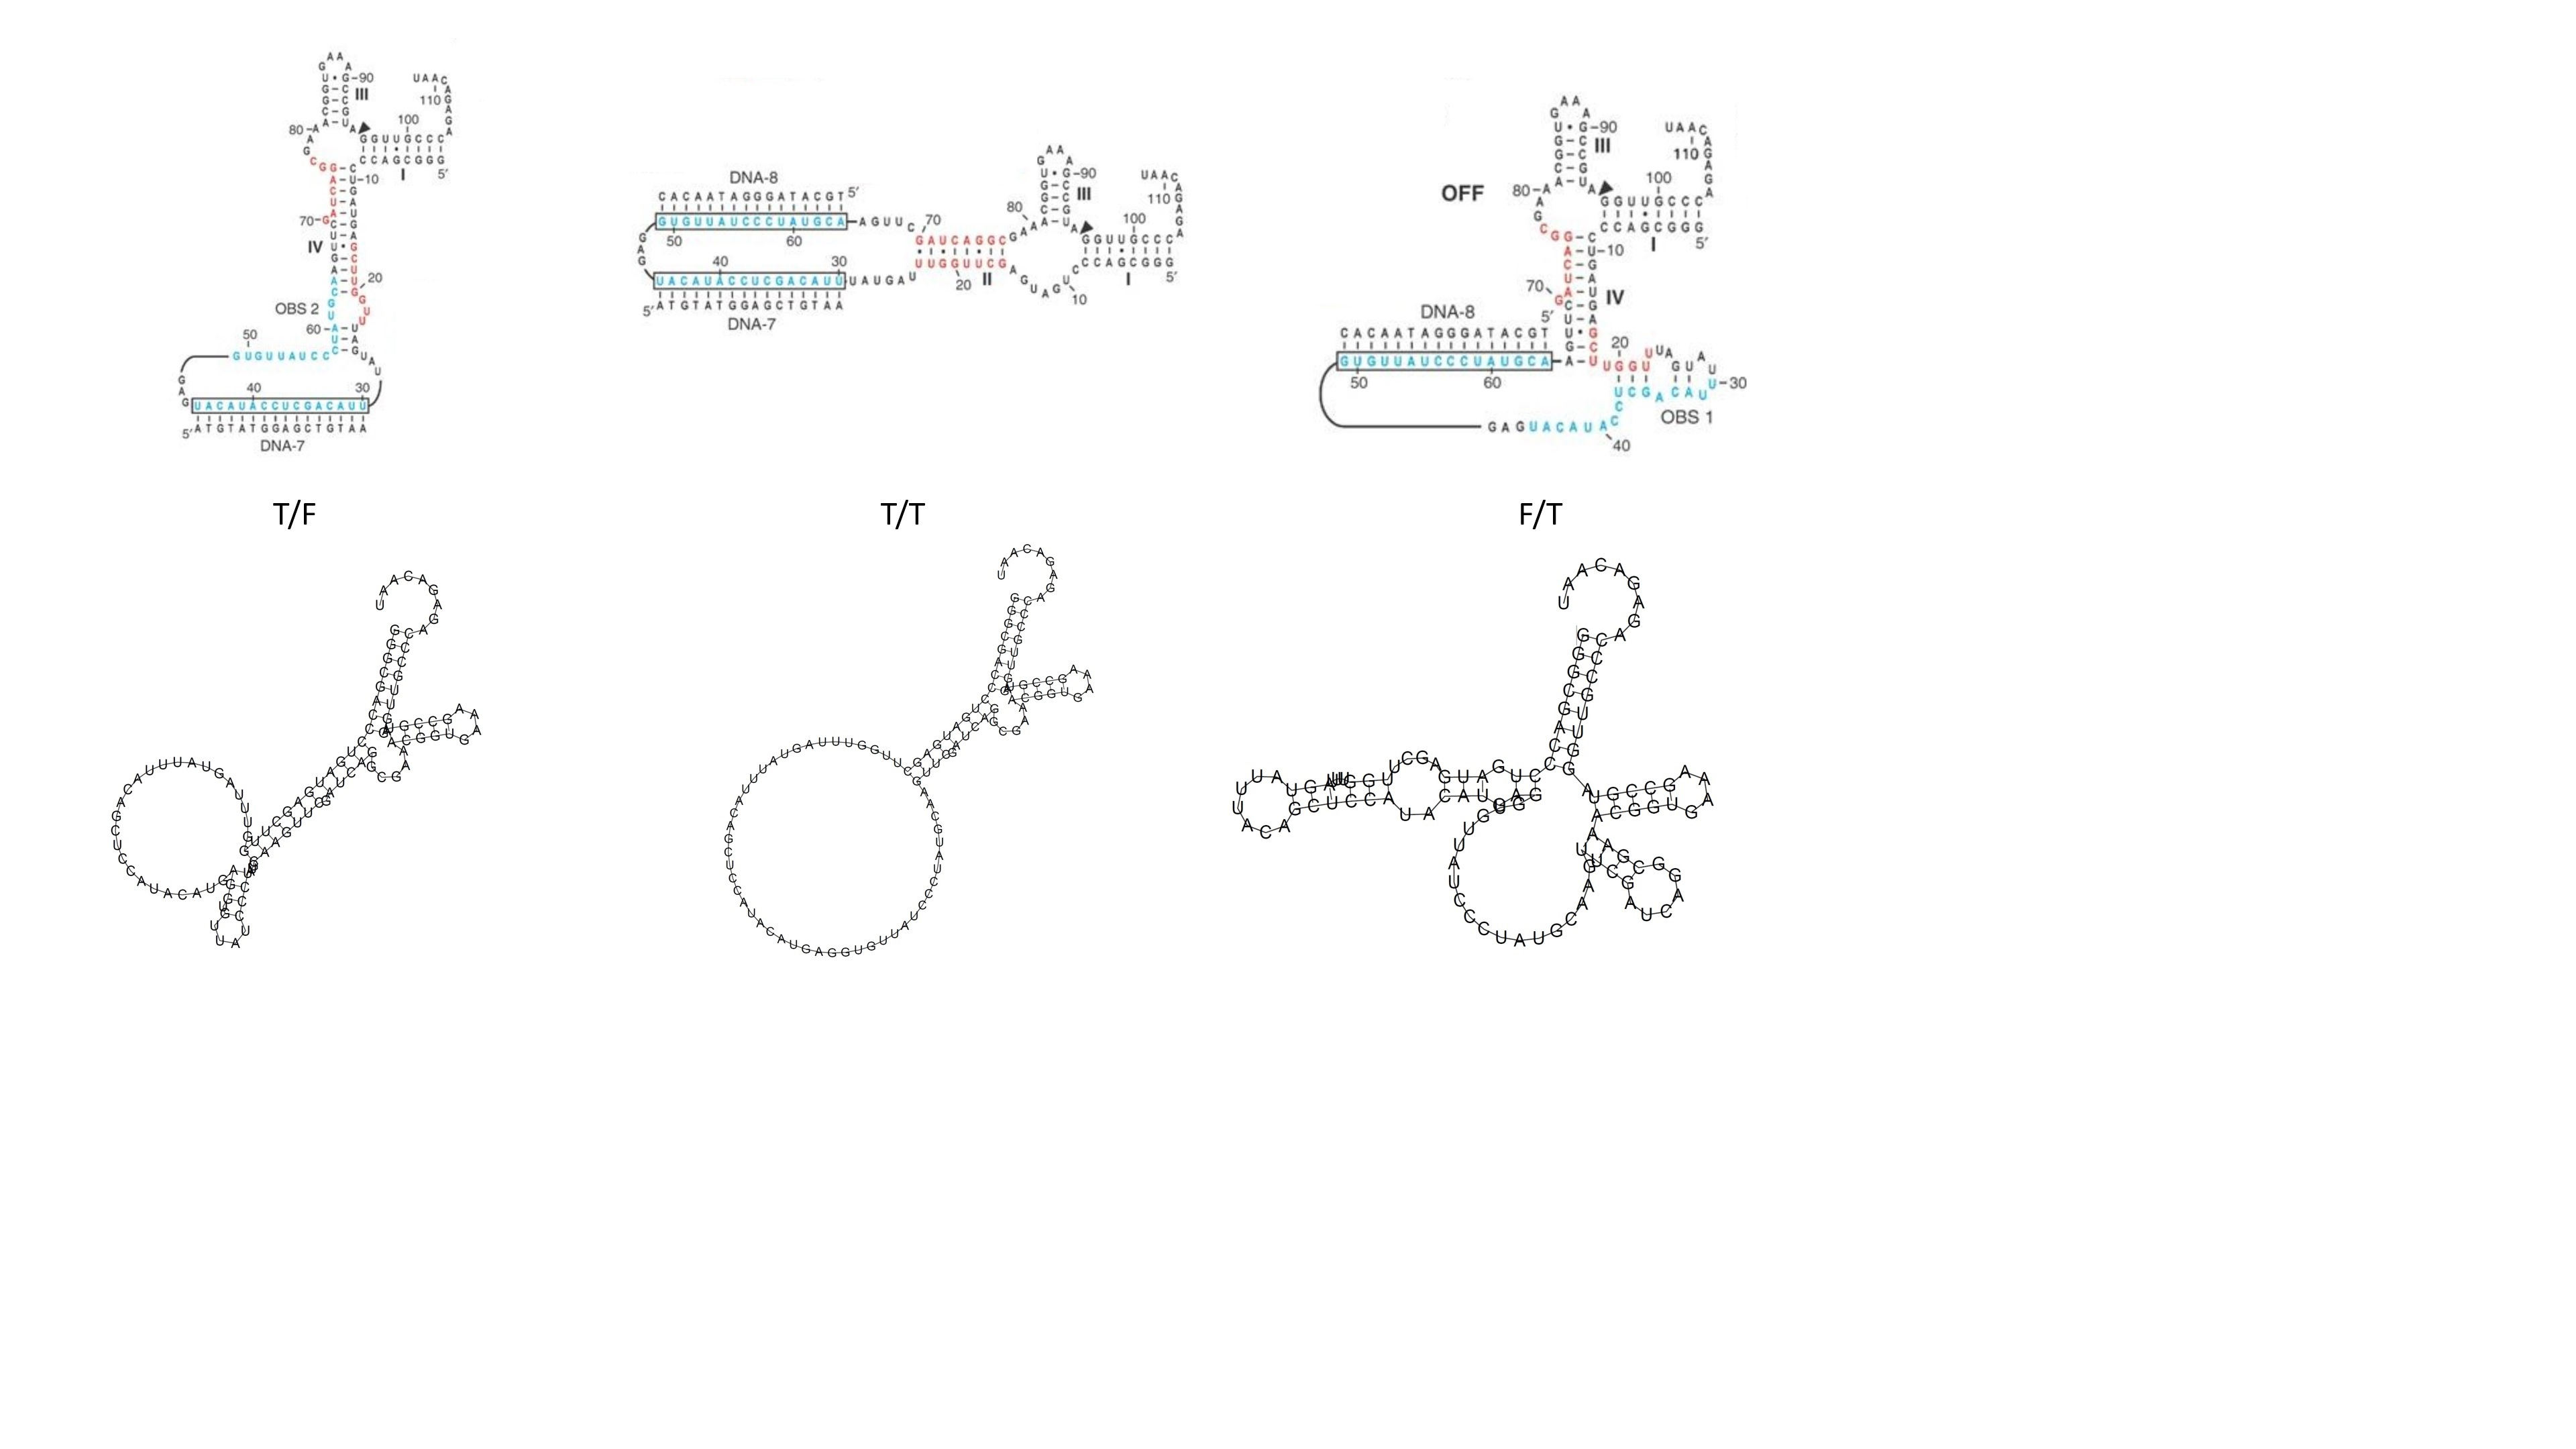

In [209]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "tfand1foldvpred.jpg", width=1200, height=1200)

#### Interestingly, we see that the RNAfold predicts none of the T/F states correctly other than the F/F. The stem for the T/T state in the predicted model is shifted a few positions upstream, and therefore the red switch region is not fully bound. Therefore we might not expect to have output with both oligos are bound. 

#### Table 3. AND-1 Truth Table
| OBS-1 | OBS-2| OUTPUT | 
|-------|------|--------|
| 0     | 0    | 0      |
|1      |0     |0       |
|0      |1     |0       |
|1      |1     |0       |

#### Of course, this table does not reflect a properly functioning AND gate.

# Generating constraint files for the four truth conditions of the OR-1 riboswitch

In [210]:
def or_obs_constraints(tru_val, start1, end1, start2, end2):

    or1_constraints = ''
    for i in range(len(or1)):
        if (i >= start1) and (i <= end1):
            or1_constraints = or1_constraints + 'x'
        elif(i >= start2) and (i <= end2):
            or1_constraints = or1_constraints + 'x'            
        else:
            or1_constraints = or1_constraints + '.'
        
    f = open("OR-1_%s_constraints.txt" %tru_val, "+w")
    for i in range(len(or1_constraints)):
        f.write(or1_constraints[i])
    f.close()
       

or_obs_constraints('TF', 27, 46, 200, 200) #input 200 when input is "false" 
or_obs_constraints('TT', 27, 46, 47, 64)
or_obs_constraints('FT', 200, 200, 47, 64)

## Let's run these through RNAfold with the constraints

In [211]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(or1 + '\n' +(open('OR-1_TF_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the T/F OR-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the T/F OR-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)



In [212]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(or1 + '\n' +(open('OR-1_TT_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the T/T OR-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the T/T OR-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)



In [214]:
folded_seq = subprocess.run(['RNAfold', '−C'], input=bytes(or1 + '\n' +(open('OR-1_FT_constraints.txt').read()) ,'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print('Here is the RNAfold output for the F/T OR-1 riboswitch:')
print(folded_seq.stderr.decode())
print(folded_seq.stdout.decode())

Here is the RNAfold output for the F/T OR-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)



## Now let's see how the RNAfold predictions match up to the paper

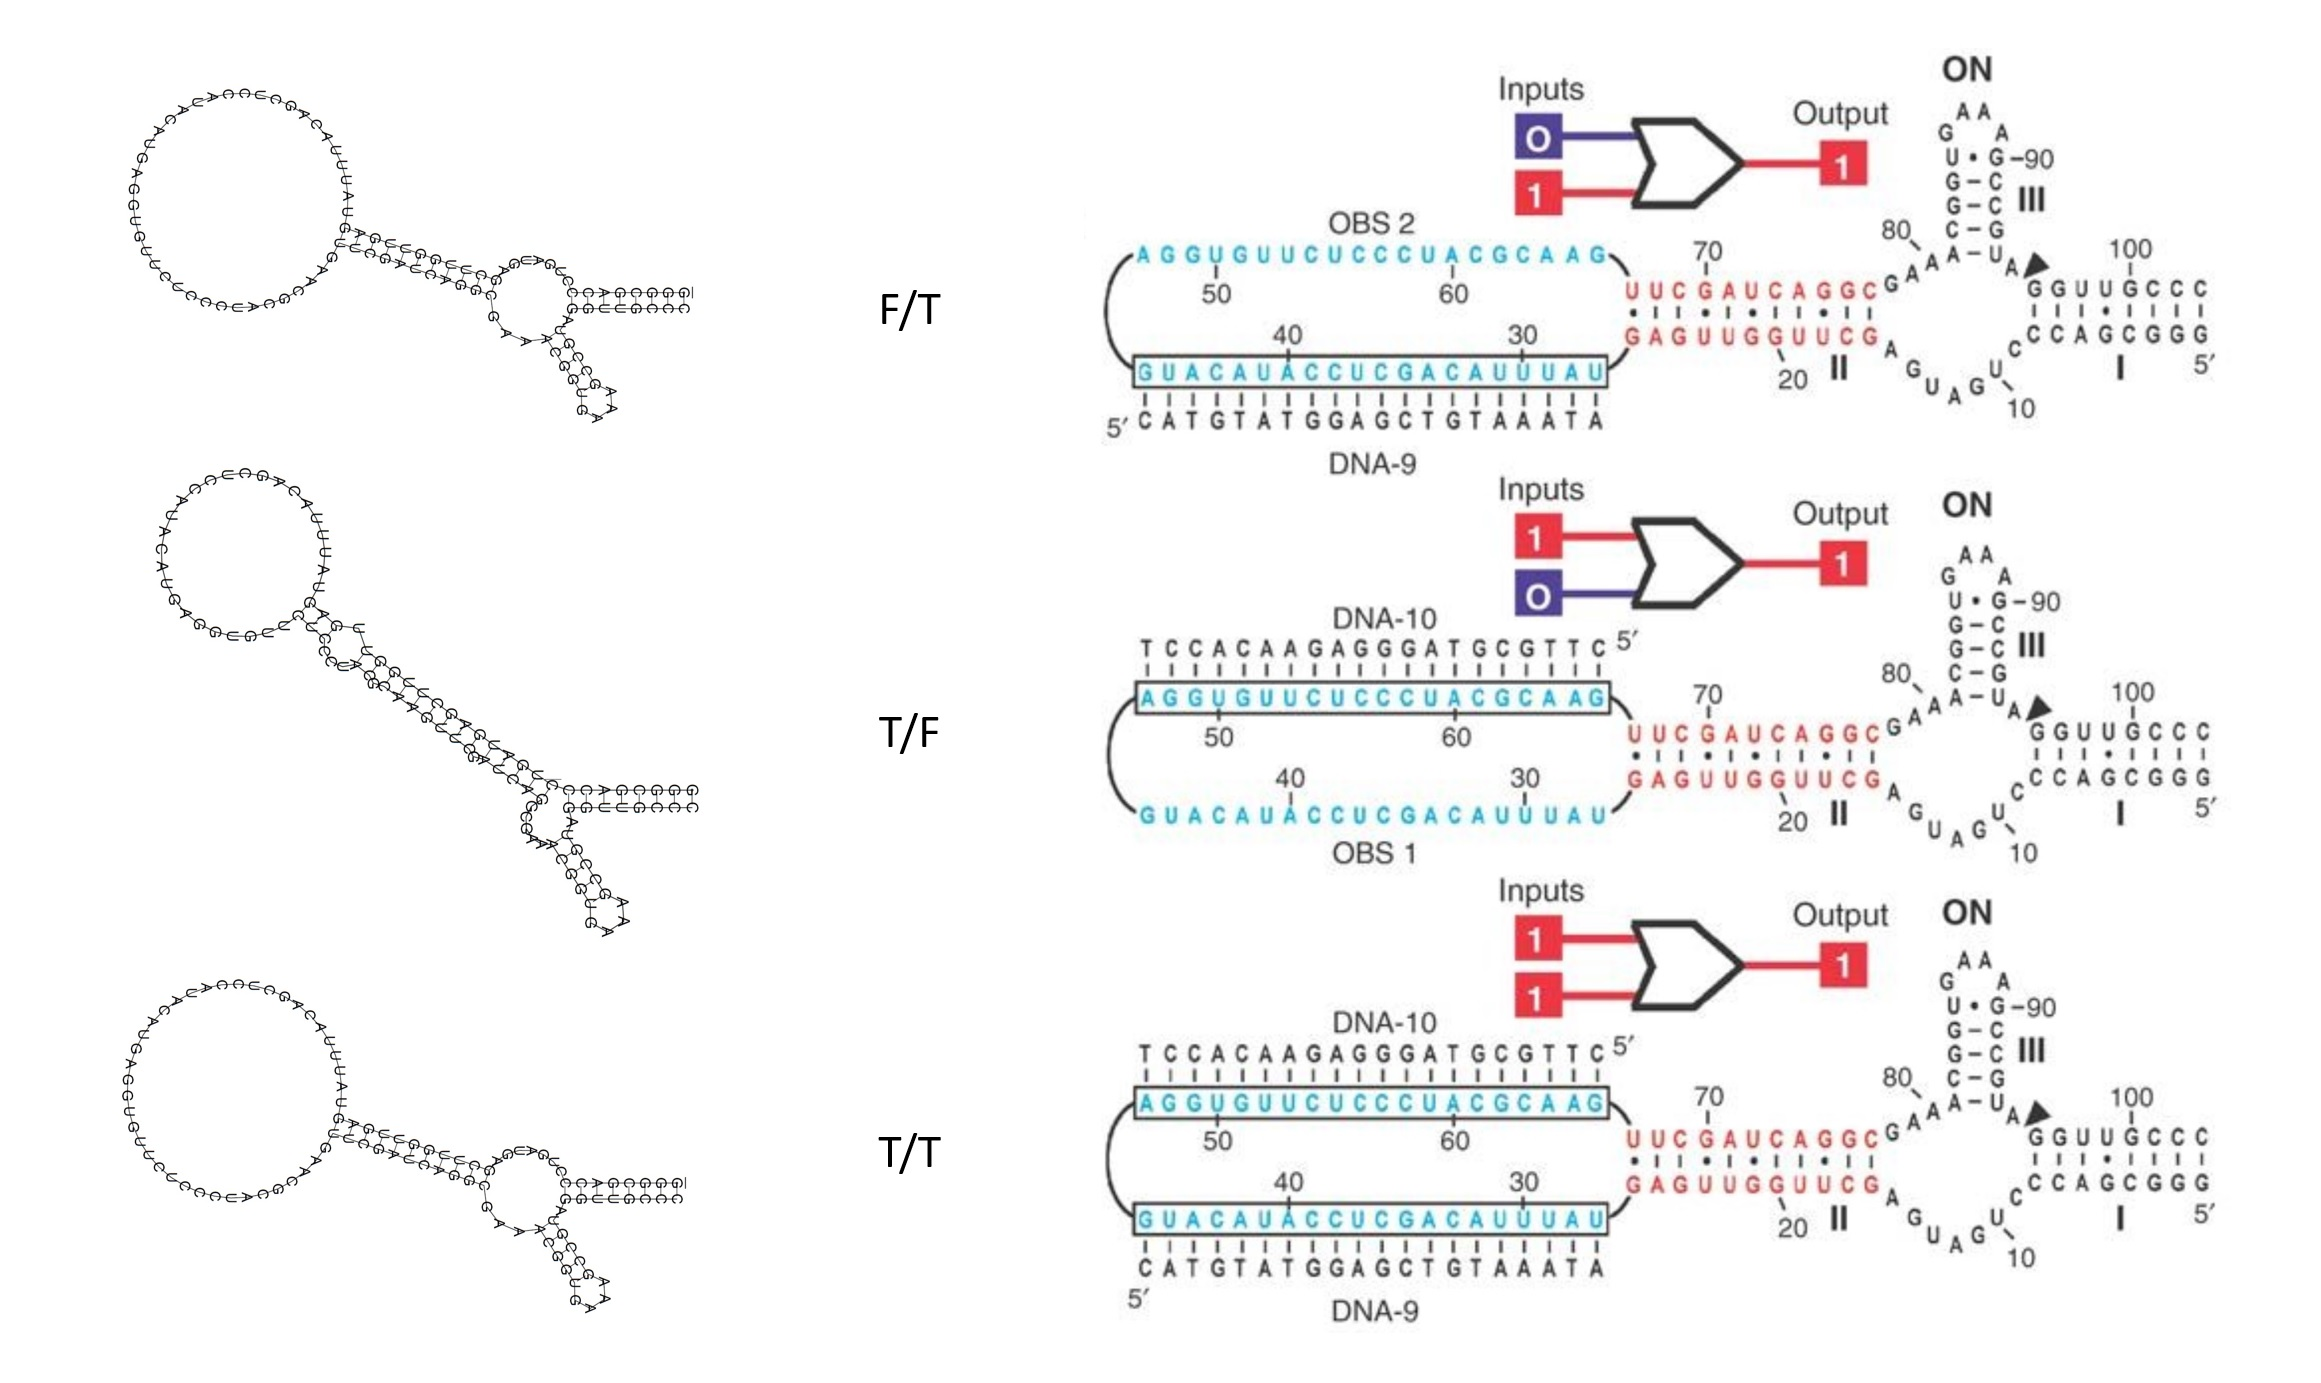

In [215]:
PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/fold_pics/"
Image(filename = PATH + "tfOR1foldvpred.jpg", width=1200, height=1200)

#### We see that for the paper, characteristic of an OR gate, all state besides F/F have output, and therefore the same conformation. For some reason, the RNAfold prediction for the T/F state has a slightly different conformation from the rest. The red switch sites in the predicted models have the proper base-pairing for the T/T and the F/T states, but not for the T/F state. According to these results, the truth table for this switch is as follows:

#### Table 4. OR-1 Truth Table
| OBS-1 | OBS-2| OUTPUT | 
|-------|------|--------|
| 0     | 0    | 0      |
|1      |0     |0       |
|0      |1     |1       |
|1      |1     |1       |

#### This truth table does not reflect a fully functioning OR gate. It would, if it were not for the improper base-pairing in the T/F state.


